In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
n_tr = 300
n_te = 300
mu_tr, sigma_tr = -0.5, 1
mu_te, sigma_te = 3, 2
x_tr = np.random.normal(mu_tr,sigma_tr, n_tr)
x_te = np.random.normal(mu_te,sigma_te, n_te)

f_out = lambda x: np.sin(x)/10

f_tr = lambda x: 1/np.sqrt(2*np.pi*sigma_tr**2)*np.exp(-(x - mu_tr)**2/(2*sigma_tr**2))
f_te = lambda x: 1/np.sqrt(2*np.pi*sigma_te**2)*np.exp(-(x - mu_te)**2/(2*sigma_te**2))
plot_precision = 100

x = np.linspace(min(min(x_tr), min(x_te)), max(max(x_tr), max(x_te)), plot_precision)

y_tr = f_out(x_tr)

x_tr_array = np.array(x_tr)
y_tr_array = np.array(y_tr)
    
A = np.vstack([x_tr_array, np.ones_like(x_te)]).T
m, b = np.linalg.lstsq(A, y_tr_array, rcond=None)[0]
best_line = lambda x: m*x + b

<Figure size 2000x1000 with 0 Axes>

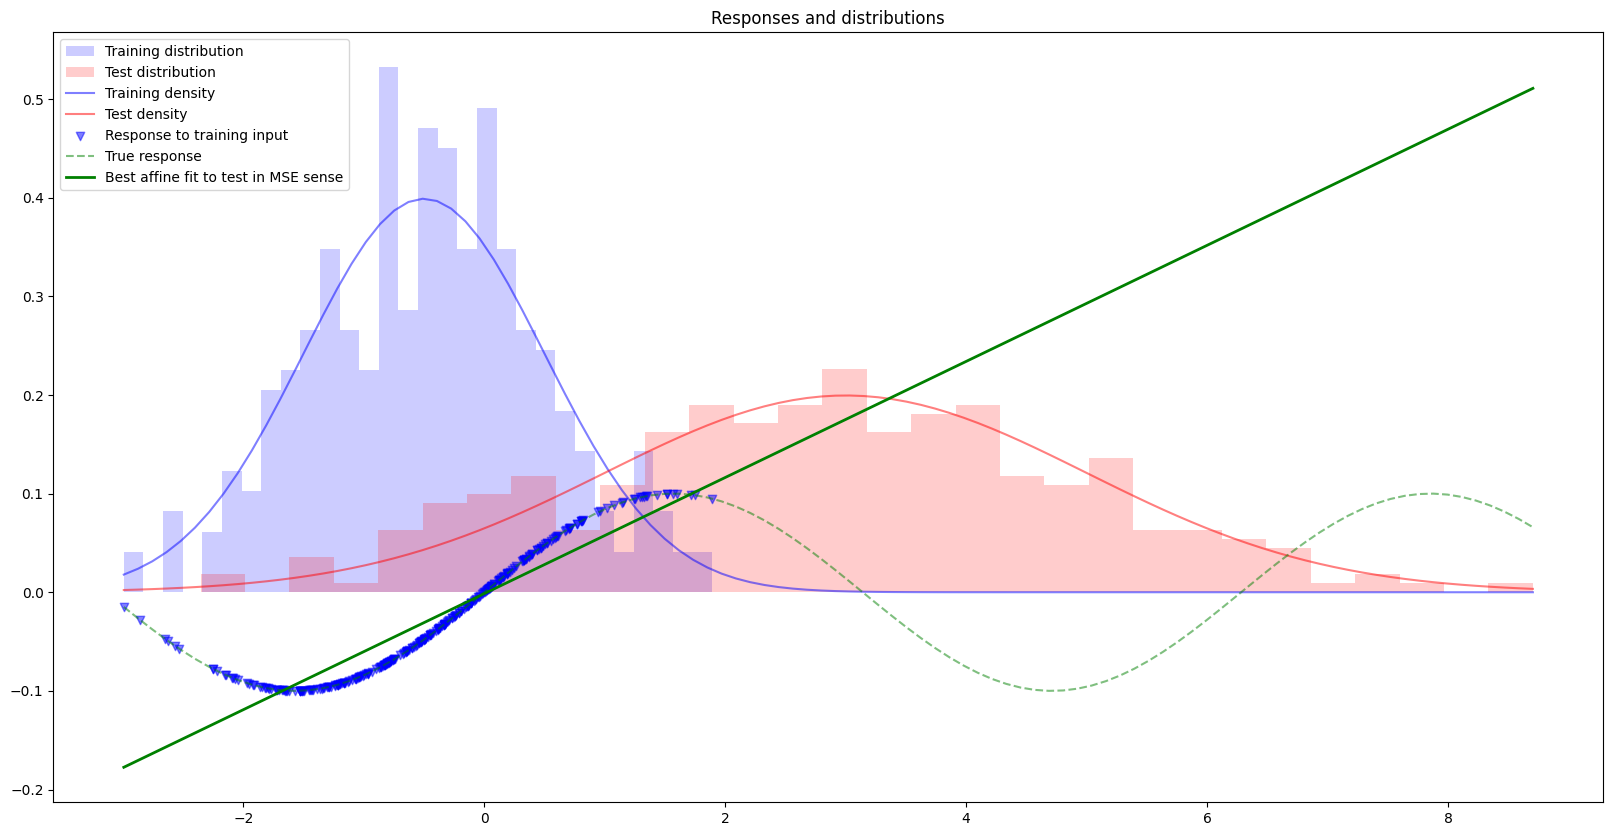

In [ ]:
plt.figure(figsize = (20, 10))
plt.hist(x_tr, density = True, bins = 30, color = "blue", alpha = 0.2, label = "Training distribution")
plt.hist(x_te, density = True, bins = 30, color = "red", alpha = 0.2, label = "Test distribution")
plt.plot(x, f_tr(x), label = "Training density", color = "blue", alpha = 0.5)
plt.plot(x, f_te(x), label = "Test density", color = "red", alpha = 0.5)
plt.scatter(x_tr, f_out(x_tr), marker = 'v', color = "blue", alpha = 0.5, label = "Response to training input")
plt.scatter(x_te, f_out(x_te), marker = '^', color = "red", alpha = 0.5, label = "Response to test input")
plt.title("Responses and distributions")
plt.plot(x, f_out(x), linestyle = "--", color = "green", label = "True response", alpha = 0.5)
plt.plot(x, best_line(x), color = "green", linewidth = "2", label = "Best affine fit to test in MSE sense")
plt.legend()